<h1> Groupe 2 - Statistics  

> Annexe Notebook

<span class="tocSkip"></span>

> *Authors :  
ANDRIEU Anaïs  
CHALOGNE Damien    
KRUMEICH Laetitia   
LEROYER Corentin  
MARTINEAU Enzo  
MIROUSE Sylvaine    
OLLIVIER Cassandre   
PACE Marine*

</h1>

# Introduction

This notebook includes some additional analyses carried out during the project:
<p>
    <li>Several complementary PCA to those presented in the results</li>
    <li>An analyse of the distribution of words following the dataset to support some of the hypotheses of the text group</li>
    <li>An analysis of the documents essential to start the correlation work</li>   
</p>

## Highlight

The analysis highlighted in this notebook is the analysis of similarities in the distribution of words in corpora.   
This analysis is on annexes because it is not part of the objectives of our group but it is very interesting and represents an essential work when one wishes to generalize an algorithm to several different data sources.

# Environment

## Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats
import seaborn as sns

## Data loading

In [2]:
workpath = "/home/ddm2018-1/Documents/sauvegarde_ordi-fac_12_19/M2/Projet_Inter_Promo/Interpromo2020/Interpromo2020/AllData/"

In [4]:
all_data_v2 = pd.read_csv(workpath+'ALL_DATA_V2.csv')

/home/ddm2018-1/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,28,29,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
all_data_annotate = pd.read_csv(workpath+'ALL_DATA_ANNOTATE.csv', sep = ',')

In [4]:
all_data = pd.read_csv(workpath+'ALL_DATA.csv', sep = ',')

/home/ddm2018-1/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,27,28,36,37,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
# DataFrame of data
tf_annotate = pd.read_csv(workpath + "g4_tf_ALL_DATA_ANNOTATE.csv", encoding='utf8',
                          header=0, error_bad_lines=False, sep=',')
tf_others_annotate = pd.read_csv(workpath + "g4_tf_OTHERS_DATA_ANNOTATE.csv", encoding='utf8',
                                 header=0, error_bad_lines=False, sep=',')
tf_twitter = pd.read_csv(workpath + "g4_tf_TWITTER.csv", encoding='utf8',
                         header=0, error_bad_lines=False, sep=',')

#  Principal component analysies

## PCA on rates by type of travellers

###  Preprocessing

In [ ]:
data_src1 = all_data[all_data['Data_Source'] == 'Airline Quality Airline']

In [6]:
name = data_src1['Type_Of_Traveller']
linesName = name.unique()
linesName

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure',
       nan], dtype=object)

In [7]:
linesName = np.delete(linesName, 4)
linesName

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure'],
      dtype=object)

In [8]:
dataCount = data_src1.groupby('Type_Of_Traveller').count()
dataCount = dataCount.iloc[:, 13:38]
dataCount

,Cabin_Staff_Service,Lounge_Staff_Service,Bar_And_Beverages,Food_And_Beverages,Ground_Service,Catering,Cleanliness,Lounge_Comfort,Aisle_Space,Wifi_And_Connectivity,...,Seat_Comfort,Seat_Legroom,Seat_Storage,Seat_Recline,Seat_Width,Washrooms,Value_For_Money,Overall_Customer_Rating,Overall_Service_Rating,Overall_Airline_Rating
Type_Of_Traveller,,,,,,,,,,,,,,,,,,,,,
Business,9858,0,0,8121,10057,0,0,0,0,3088,...,9873,0,0,0,0,0,10144,10146,0,0
Couple Leisure,15135,0,0,11801,15495,0,0,0,0,4379,...,15167,0,0,0,0,0,15683,15683,0,0
Family Leisure,11351,0,0,8809,11697,0,0,0,0,3788,...,11385,0,0,0,0,0,11838,11838,0,0
Solo Leisure,20964,0,0,16655,21447,0,0,0,0,5943,...,20994,0,0,0,0,0,21742,21751,0,0


In [9]:
groupData = data_src1.groupby('Type_Of_Traveller').mean()
groupData

,Cabin_Staff_Service,Lounge_Staff_Service,Bar_And_Beverages,Food_And_Beverages,Ground_Service,Catering,Cleanliness,Lounge_Comfort,Aisle_Space,Wifi_And_Connectivity,...,Viewing_Tv_Screen,Power_Supply,Seat_Comfort,Seat_Legroom,Seat_Storage,Seat_Recline,Seat_Width,Washrooms,Value_For_Money,Overall_Airline_Rating
Type_Of_Traveller,,,,,,,,,,,,,,,,,,,,,
Business,3.049706,NaN,NaN,2.722448,2.578503,NaN,NaN,NaN,NaN,2.150259,...,NaN,NaN,2.791755,NaN,NaN,NaN,NaN,NaN,2.610903,NaN
Couple Leisure,2.924348,NaN,NaN,2.642149,2.509132,NaN,NaN,NaN,NaN,1.978991,...,NaN,NaN,2.634008,NaN,NaN,NaN,NaN,NaN,2.596761,NaN
Family Leisure,2.925557,NaN,NaN,2.681916,2.500128,NaN,NaN,NaN,NaN,2.072334,...,NaN,NaN,2.680896,NaN,NaN,NaN,NaN,NaN,2.589204,NaN
Solo Leisure,3.238313,NaN,NaN,2.975683,2.800625,NaN,NaN,NaN,NaN,2.202423,...,NaN,NaN,2.950700,NaN,NaN,NaN,NaN,NaN,2.924432,NaN


In [10]:
groupData = groupData.dropna(axis='columns', how='all')
groupData = groupData.dropna(thresh=4, axis=1)
groupData = groupData.reset_index()

In [11]:
groupData

,Type_Of_Traveller,Cabin_Staff_Service,Food_And_Beverages,Ground_Service,Wifi_And_Connectivity,Inflight_Entertainment,Seat_Comfort,Value_For_Money
0,Business,3.049706,2.722448,2.578503,2.150259,2.675417,2.791755,2.610903
1,Couple Leisure,2.924348,2.642149,2.509132,1.978991,2.651410,2.634008,2.596761
2,Family Leisure,2.925557,2.681916,2.500128,2.072334,2.706519,2.680896,2.589204
3,Solo Leisure,3.238313,2.975683,2.800625,2.202423,2.902637,2.950700,2.924432


Remove types of travellers

In [12]:
groupData = groupData.iloc[:, 1:13]

In [13]:
# number of observations
n = groupData.shape[0]
n
# number of variables
p = groupData.shape[1]
p

7

In [15]:
sc = StandardScaler()

Data Normalisation

In [16]:
Z = sc.fit_transform(groupData)

Instantiation

In [17]:
pca = PCA(svd_solver='full')
print(pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


### Calcul of coordinates

In [18]:
# calculations
coord = pca.fit_transform(Z)

In [19]:
# number of calculated components
print(pca.n_components_)  # 4

4


In [20]:
# explained variance
print(pca.explained_variance_)

[8.68518010e+00 5.25581968e-01 1.22571267e-01 2.15864648e-32]


In [21]:
# adjusted value
eigval = (n-1)/n*pca.explained_variance_
print(eigval)

[6.51388507e+00 3.94186476e-01 9.19284501e-02 1.61898486e-32]


In [22]:
# proportion of variance explained
print(pca.explained_variance_ratio_)

[9.30555011e-01 5.63123537e-02 1.31326357e-02 2.31283551e-33]


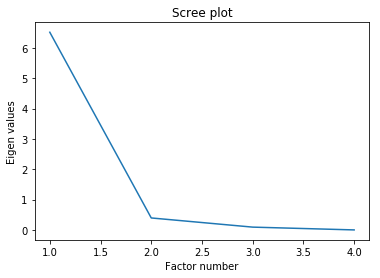

In [23]:
# scree plot
plt.plot(np.arange(1, n+1), eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Determining the number of factors to remember

In [24]:
# thresholds for testing broken sticks
bs = 1/np.arange(n, 0, -1)
bs = np.cumsum(bs)
bs = bs[::-1]

# broken sticks test
print(pd.DataFrame({'Val.Propre': eigval, 'Seuils': bs}))

     Val.Propre    Seuils
0  6.513885e+00  2.083333
1  3.941865e-01  1.083333
2  9.192845e-02  0.583333
3  1.618985e-32  0.250000


### Display of Airline Companies in the first plan

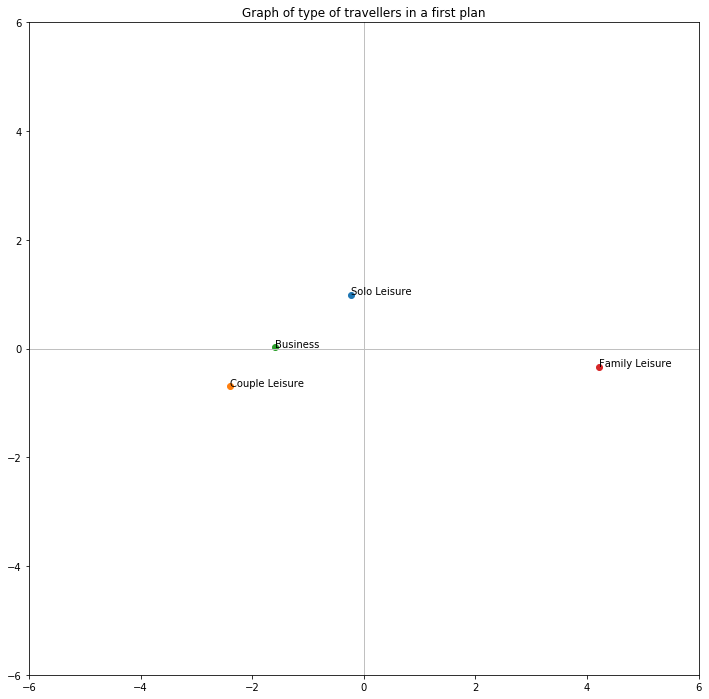

In [25]:
# positioning of individuals in the first plan
fig, axes = plt.subplots(figsize=(12, 12))
axes.set_xlim(-6, 6)
axes.set_ylim(-6, 6)

# placement of observation labels
for i in range(n):
    plt.scatter(coord[i, 0], coord[i, 1])
    plt.annotate(linesName[i], (coord[i, 0], coord[i, 1]))

# add the axes
plt.plot([-6, 6], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-6, 6], color='silver', linestyle='-', linewidth=1)
plt.title('Graph of type of travellers in a first plan')

# display
plt.show()

In [26]:
# contribution of individuals to total inertia
di: float = np.sum(Z**2, axis=1)
print(pd.DataFrame({'ID': linesName, 'd_i': di}))

# the Business and Family Leisure classes stand out the most,
# and we find them at both ends of the first factor axis which carries 50.34% of the available information

               ID        d_i
0    Solo Leisure   1.084098
1  Couple Leisure   6.301846
2        Business   2.757299
3  Family Leisure  17.856757


In [27]:
# quality of representation of individuals - COS2
cos2: float = coord**2
for j in range(n):
    cos2[:, j] = cos2[:, j]/di

print(pd.DataFrame({'id': linesName,
                    'COS2_1': cos2[:, 0], 'COS2_2': cos2[:, 1]}))

               id    COS2_1    COS2_2
0    Solo Leisure  0.049385  0.908880
1  Couple Leisure  0.910391  0.076546
2        Business  0.912597  0.000342
3  Family Leisure  0.993941  0.006054


In [28]:
# let’s check the theory - sum in line of cos2 = 1
print(np.sum(cos2, axis=1))

[1. 1. 1. 1.]


In [30]:
# contributions to the axes
ctr: float = coord**2
for j in range(n):
    ctr[:, j] = ctr[:, j]/(n*eigval[j])

print(pd.DataFrame({'id': linesName,
                    'CTR_1': ctr[:, 0], 'CTR_2': ctr[:, 1]}))

               id     CTR_1     CTR_2
0    Solo Leisure  0.002055  0.624904
1  Couple Leisure  0.220189  0.305934
2        Business  0.096575  0.000598
3  Family Leisure  0.681182  0.068564


### Display of the correlation circle

In [31]:
# square root of own values
sqrt_eigval = np.sqrt(eigval)
sqrt_eigval

array([2.55223139e+00, 6.27842716e-01, 3.03197048e-01, 1.27239336e-16])

In [32]:
# correlation of variables with axes
corvar: float = np.zeros((p, n))

for k in range(n):
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

In [33]:
# we display for the first two axes
print(pd.DataFrame({'id': groupData.columns,
                    'COR_1': corvar[:, 0], 'COR_2': corvar[:, 1]}))

                       id     COR_1     COR_2
0     Cabin_Staff_Service  0.986768  0.065956
1      Food_And_Beverages  0.995494 -0.087868
2          Ground_Service  0.989780 -0.089441
3   Wifi_And_Connectivity  0.875732  0.469592
4  Inflight_Entertainment  0.952274 -0.228875
5            Seat_Comfort  0.983064  0.176066
6         Value_For_Money  0.964031 -0.264984


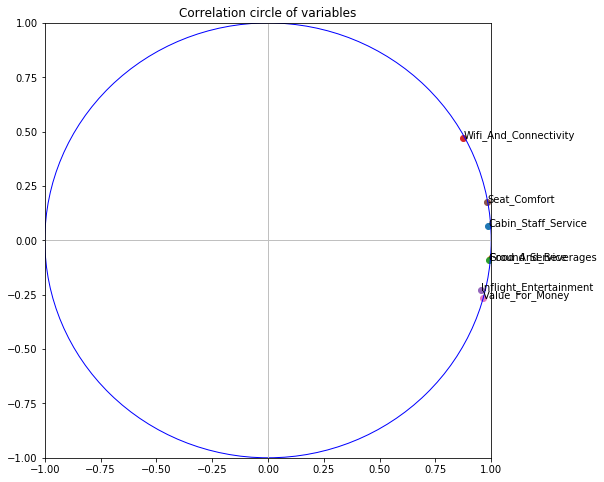

In [34]:
# circle of correlations
fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# label display (variable names)
for j in range(p):
    x = corvar[j, 0]
    y = corvar[j, 1]
    plt.scatter(x, y)
    plt.annotate(groupData.columns[j], (x, y))

# add the axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)
plt.title('Correlation circle of variables')

# add a circle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(circle)

# display
plt.show()

In [35]:
# square cos of the variables
cos2var: float = corvar**2
print(pd.DataFrame({'id': groupData.columns,
                    'COS2_1': cos2var[:, 0], 'COS2_2': cos2var[:, 1]}))

                       id    COS2_1    COS2_2
0     Cabin_Staff_Service  0.973711  0.004350
1      Food_And_Beverages  0.991008  0.007721
2          Ground_Service  0.979663  0.008000
3   Wifi_And_Connectivity  0.766906  0.220516
4  Inflight_Entertainment  0.906826  0.052384
5            Seat_Comfort  0.966415  0.030999
6         Value_For_Money  0.929356  0.070216


In [36]:
# contributions
ctrvar: float = cos2var

for k in range(n):
    ctrvar[:, k] = ctrvar[:, k]/eigval[k]

# only the first two axes are displayed
print(pd.DataFrame({'Variables': groupData.columns,
                    'CTR_1': ctrvar[:, 0], 'CTR_2': ctrvar[:, 1]}))

                Variables     CTR_1     CTR_2
0     Cabin_Staff_Service  0.149482  0.011036
1      Food_And_Beverages  0.152138  0.019587
2          Ground_Service  0.150396  0.020294
3   Wifi_And_Connectivity  0.117734  0.559421
4  Inflight_Entertainment  0.139214  0.132891
5            Seat_Comfort  0.148362  0.078641
6         Value_For_Money  0.142673  0.178130


### Interpretation

In average, we can see that people who traveled in family leisure gave higher rates than others.

## PCA on rates by constructors with all_data rates

### Preprocessing

In [63]:
all_data = all_data_v2.copy()

Creation of a dataframe with the notes and the constructors

In [64]:
notes_data = all_data.iloc[:, 14:28]
df = all_data.iloc[:, 30:37]
df2 = all_data['Constructor']
notes_data = pd.concat([df2, notes_data], axis=1)
notes_data = pd.concat([notes_data, df], axis=1)

In [65]:
notes_data.head()

,Constructor,Cabin_Staff_Service,Lounge_Staff_Service,Bar_And_Beverages,Food_And_Beverages,Ground_Service,Catering,Cleanliness,Lounge_Comfort,Aisle_Space,...,Viewing_Tv_Screen,Power_Supply,Seat,Seat_Legroom,Seat_Storage,Seat_Recline,Seat_Width,Washrooms,Value_For_Money,Overall_Customer_Rating
0,Embraer,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1,Embraer,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [66]:
notes_data = notes_data.groupby('Constructor').mean()
notes_data = notes_data.reset_index()

In [67]:
# Constructor name
label = notes_data['Constructor']

Selection of notes columns

In [68]:
# We only keep columns without NaN
constructACP = notes_data.dropna(axis='columns', how='any')
constructACP = constructACP.iloc[:, 1:15]

Number of individuals

In [70]:
n = constructACP.shape[0]
n

7

Number of variables

In [71]:
p = constructACP.shape[1]
p

7

Data normalisation

In [72]:
sc = StandardScaler()
constructCR = sc.fit_transform(constructACP)

Instanciation

In [73]:
acpConstruct = PCA(svd_solver='full')

### Calcul of coordinates

Coordinates

In [74]:
coord = acpConstruct.fit_transform(constructCR)

Proportion explained variance

In [75]:
acpConstruct.explained_variance_ratio_

array([6.37560422e-01, 3.13852580e-01, 3.62754653e-02, 1.13950522e-02,
       8.43604409e-04, 7.28762186e-05, 3.93824404e-34])

Eigen Values

In [76]:
eigval = ((n-1)/n)*acpConstruct.explained_variance_
eigval

array([4.46292295e+00, 2.19696806e+00, 2.53928257e-01, 7.97653651e-02,
       5.90523086e-03, 5.10133530e-04, 2.75677083e-33])

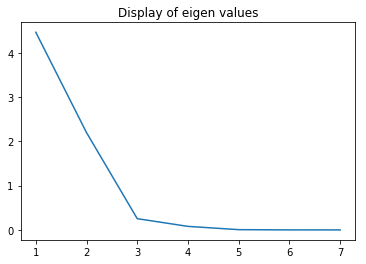

In [77]:
# Display of eigen values

plt.plot(np.arange(1, p+1), eigval)
plt.title ("Display of eigen values")
plt.show()

### Display of Constructors in the first plan

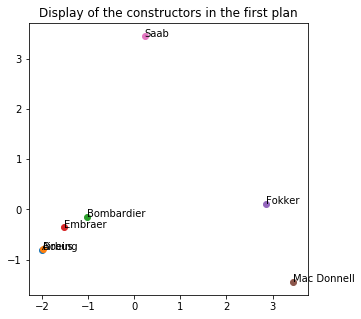

In [78]:
fig = plt.figure(figsize=(5, 5))

for i in range(n):
    x = coord[i, 0]
    y = coord[i, 1]
    plt.scatter(x, y)
    plt.text(x, y, label.iloc[i])

    plt.title ("Display of the constructors in the first plan")
plt.show()

Quality of individuals corelations

In [79]:
# Contribution des individus dans l'inertie totale
di = np.sum(constructCR**2, axis=1)
pd.DataFrame({'ID': label, 'd_i': di})

# Quality of individuals corelations
cos2 = coord**2
for j in range(p):
    cos2[:, j] = cos2[:, j]/di

pd.DataFrame(
    {'id': label, 'COS2_1': cos2[:, 0], 'COS2_2': cos2[:, 1]})

,id,COS2_1,COS2_2
0,Airbus,0.844975,0.134899
1,Boeing,0.841465,0.137048
2,Bombardier,0.765375,0.016484
3,Embraer,0.902994,0.050282
4,Fokker,0.885683,0.001159
5,Mac Donnell,0.815000,0.143656
6,Saab,0.004418,0.984928


### Display of the correlation circle

Corelation of variables on the first plan

In [80]:
sqrt_eigval = np.sqrt(eigval)

# Corelation of variables with axis
corvar = np.zeros((p, p))

for k in range(p):
    corvar[:, k] = acpConstruct.components_[k, :] * sqrt_eigval[k]
    
# Coordinates of variables on the first plan
pd.DataFrame(
    {'id': label, 'COR_1': corvar[:, 0], 'COR_2': corvar[:, 1]})

,id,COR_1,COR_2
0,Airbus,-0.805135,0.589995
1,Boeing,-0.794973,0.594168
2,Bombardier,-0.920470,0.359358
3,Embraer,-0.605053,-0.719371
4,Fokker,-0.570760,-0.791943
5,Mac Donnell,-0.994692,-0.009911
6,Saab,-0.808804,-0.471098


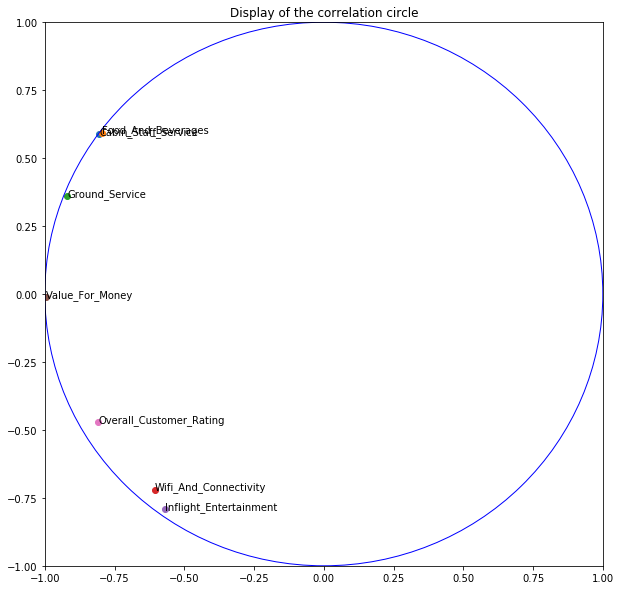

In [82]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

for j in range(p):
    x = corvar[j, 0]
    y = corvar[j, 1]
    plt.scatter(x, y)
    plt.text(x, y, constructACP.columns[j])

cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

plt.title("Display of the correlation circle")
plt.show()

### Interpretation

In avegrage, we can see that Airbus and Boeing are two constructors very similars. Moreover, Saab constructor has higher rates on Food_And_Beverages and Cabin_Staff_Service than Bombardier, Embraer, Airbus and Boeing. These last ones have higher rates in entertainment.
The constructors which have the best rates on Seat_Comfort are Embraer and Bombardier.

Furthermore, we can see a correlation between Wifi_And_Connectivity and Inflight_Entertainment variables which makes sens.

However, maybe this PCA is not relevant because only Seat_Comfort is linked to Constructors. Cabin_Staff_Service or Food_And_Beverages are not linked to Constructors but to Airlines companies.

# Similarity of word distributions

At the request of group 4, we had to carry out an analysis on the similarities between the distributions of 3 corpuses corresponding to 3 data files. The goal was to determine if it is possible to use the same learning algorithm for the different data sources wich are ALL_DATA_ANNOTATE, OTHERS_DATA_ANNOTATE and TWITTER. 

To do this, we first looked at the distribution of word density, then in a second step, we calculated the spearman correlation coefficient which allows us to look at the distribution of the data in relation to the rank of the words in the corpus (rank obtained thanks to the mean of the tf).

## Data visualization

Shape of DataFrames

In [84]:
tf_annotate.shape

(3647, 968)

In [85]:
tf_others_annotate.shape

(2380, 1260)

In [86]:
tf_twitter.shape

(17667, 5323)

Head of DataFrames

In [87]:
tf_annotate.head()

,index,commentaire,100,10a,180,190,1hr,1st,200,2013,...,worry,worth,wouldn,year,yes,york,young,zealand,zero,zurich
0,0,excellent flight way adria airway manchester l...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,impressed pleasant attitude responsive service...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,good flight nice offer hot meal arn ath leg co...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,fly athens rhodes week ago fantastic airline s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,staff excellent customer service orient meal g...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
tf_others_annotate.head()

,index,commentaire,100,180,1hr,1st,200,2017,2018,2nd,...,wouldn,wrap,write,wrong,year,yes,young,zealand,zero,zone
0,0,crew nice helpful,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,upgrade business husband cabin economy love sp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,business seat tight tray table fall time man s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,suck allow suitcase understand,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,mayonnaise sandwich taste,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
tf_twitter.head()

,index,commentaire,000,000th,001,05r,06l,09l,09r,100,...,ðÿš,ðÿž,ðÿžˆ,œthe,œwe,œðÿ,šðÿ,žðÿ,ƒâœˆï,ƒðÿ
0,"(0, 0)",good news passenger prague route airbaltic inc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(1, 0)",thank gtf mount kilimanjaro breathe easy weeke...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(2, 0)",sunbathe buchar csm airbus a220 300 effective ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(3, 0)",today open long await airbaltic route riga dub...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(4, 0)",new airbaltic route riga dublin launch today t...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Finding common words

In [90]:
# retrieve column names (words)
set_annotate = set(tf_annotate.iloc[:, 2:])
set_others_annotate = set(tf_others_annotate.iloc[:, 2:])
set_twitter = set(tf_twitter.iloc[:, 2:])

In [91]:
# Words in common between sources
set_all = set_annotate & set_others_annotate & set_twitter

In [92]:
# Words who are not common words
set_annotate_wcw = set_annotate - set_all
set_others_annotate_wcw = set_others_annotate - set_all
set_twitter_wcw = set_twitter - set_all

In [93]:
# Starting dataframe with only common words
annotate_cw = tf_annotate[list(set_all)]
others_annotate_cw = tf_others_annotate[list(set_all)]
twitter_cw = tf_twitter[list(set_all)]

Proportion of commun words in tf_annotate :

In [94]:
(annotate_cw.shape[1]/tf_annotate.shape[1])*100

70.35123966942149

Proportion of commun words in tf_others_annotate :

In [95]:
(others_annotate_cw.shape[1]/tf_others_annotate.shape[1])*100

54.047619047619044

Proportion of commun words in tf_twitter :

In [96]:
(twitter_cw.shape[1]/tf_twitter.shape[1])*100

12.793537478865302

In [97]:
# Starting dataframe without common words
annotate_wcw = tf_annotate[list(set_annotate_wcw)]
others_annotate_wcw = tf_others_annotate[list(set_others_annotate_wcw)]
twitter_wcw = tf_twitter[list(set_twitter_wcw)]

## Frequencies of words

### in DATA_ANNOTATE

With all words

In [98]:
# sum of frequencies for each words in tf_annotate
sum_annotate = tf_annotate.iloc[:, 2:].sum()

In [99]:
sum_annotate.describe()

count     966.000000
mean       39.100414
std       133.726243
min         5.000000
25%         7.000000
50%        12.000000
75%        26.000000
max      2612.000000
dtype: float64

With common words only

In [100]:
# sum of frequencies for each words in tf_annotate with only common words
sum_annotate_cw = annotate_cw.sum()

In [101]:
sum_annotate_cw.describe()

count     681.000000
mean       49.992658
std       157.118834
min         5.000000
25%         9.000000
50%        16.000000
75%        36.000000
max      2612.000000
dtype: float64

Without common words

In [102]:
# sum of frequencies for each words in tf_annotate without common words
sum_annotate_wcw = annotate_wcw.sum()

In [103]:
sum_annotate_wcw.describe()

count    285.000000
mean      13.073684
std       26.287914
min        5.000000
25%        6.000000
50%        7.000000
75%       10.000000
max      328.000000
dtype: float64

### in OTHERS_DATA_ANNOTATE

With all words

In [104]:
# sum of frequencies for each words in tf_others_annotate
sum_others_annotate = tf_others_annotate.iloc[:, 2:].sum()

In [105]:
sum_others_annotate.describe()

count    1258.000000
mean       33.107313
std        91.457841
min         5.000000
25%         7.000000
50%        13.000000
75%        27.000000
max      1848.000000
dtype: float64

With common words only

In [106]:
# sum of frequencies for each words in tf_others_annotate with only common words
sum_others_annotate_cw = others_annotate_cw.sum()

In [107]:
sum_others_annotate_cw.describe()

count     681.000000
mean       51.857562
std       120.578320
min         5.000000
25%        13.000000
50%        23.000000
75%        45.000000
max      1848.000000
dtype: float64

Without common words

In [108]:
# sum of frequencies for each words in tf_others_annotate without common words
sum_others_annotate_wcw = others_annotate_wcw.sum()

In [109]:
sum_others_annotate_wcw.describe()

count    577.000000
mean      10.977470
std       13.541263
min        5.000000
25%        6.000000
50%        8.000000
75%       11.000000
max      190.000000
dtype: float64

### in TWITTER

With all words

In [110]:
# sum of frequencies for each words in tf_twitter
sum_twitter = tf_twitter.iloc[:, 2:].sum()

In [111]:
sum_twitter.describe()

count     5321.000000
mean        55.723548
std        374.708143
min          5.000000
25%          9.000000
50%         16.000000
75%         35.000000
max      20403.000000
dtype: float64

With common words only

In [112]:
# sum of frequencies for each words in tf_twitter with only common words
sum_twitter_cw = twitter_cw.sum()

In [113]:
sum_twitter_cw.describe()

count      681.000000
mean       161.530103
std        594.530573
min          5.000000
25%         17.000000
50%         44.000000
75%        116.000000
max      11219.000000
dtype: float64

Without common words

In [114]:
# sum of frequencies for each words in tf_twitter without common words
sum_twitter_wcw = twitter_wcw.sum()

In [115]:
sum_twitter_wcw.describe()

count     4640.000000
mean        40.194612
std        327.598443
min          5.000000
25%          8.000000
50%         14.000000
75%         28.000000
max      20403.000000
dtype: float64

## Density plots

### in DATA_ANNOTATE

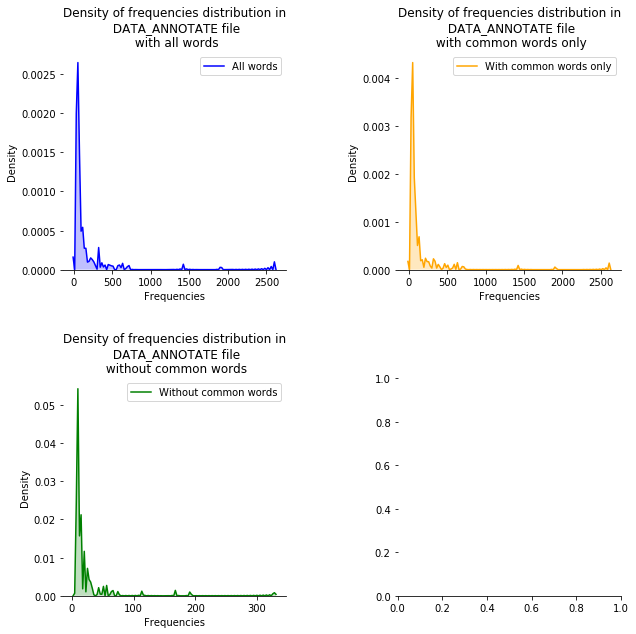

In [118]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.despine(left=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax1 = sns.distplot(sum_annotate, hist=False, color="b",
                   kde_kws={"shade": True}, ax=axes[0, 0], label="All words")
ax2 = sns.distplot(sum_annotate_cw, hist=False, color="orange",
                   kde_kws={"shade": True}, ax=axes[0, 1], label="With common words only")
ax3 = sns.distplot(sum_annotate_wcw, hist=False, color="g",
                   kde_kws={"shade": True}, ax=axes[1, 0], label="Without common words")

ax1.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n DATA_ANNOTATE file\n with all words')
ax2.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n DATA_ANNOTATE file\n with common words only')
ax3.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n DATA_ANNOTATE file\n without common words')
plt.show()

### in OTHERS_DATA_ANNOTATE

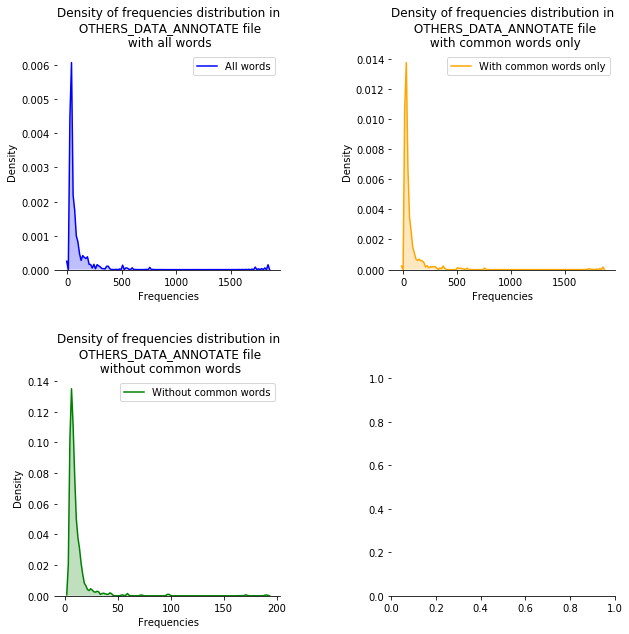

In [119]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
sns.despine(left=True)

ax1 = sns.distplot(sum_others_annotate, hist=False, color="b",
                   kde_kws={"shade": True}, ax=axes[0, 0], label="All words")
ax2 = sns.distplot(sum_others_annotate_cw, hist=False, color="orange",
                   kde_kws={"shade": True}, ax=axes[0, 1], label="With common words only")
ax3 = sns.distplot(sum_others_annotate_wcw, hist=False, color="g",
                   kde_kws={"shade": True}, ax=axes[1, 0], label="Without common words")
ax1.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n OTHERS_DATA_ANNOTATE file\n with all words')
ax2.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n OTHERS_DATA_ANNOTATE file\n with common words only')
ax3.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n OTHERS_DATA_ANNOTATE file\n without common words')
plt.show()

### in TWITTER

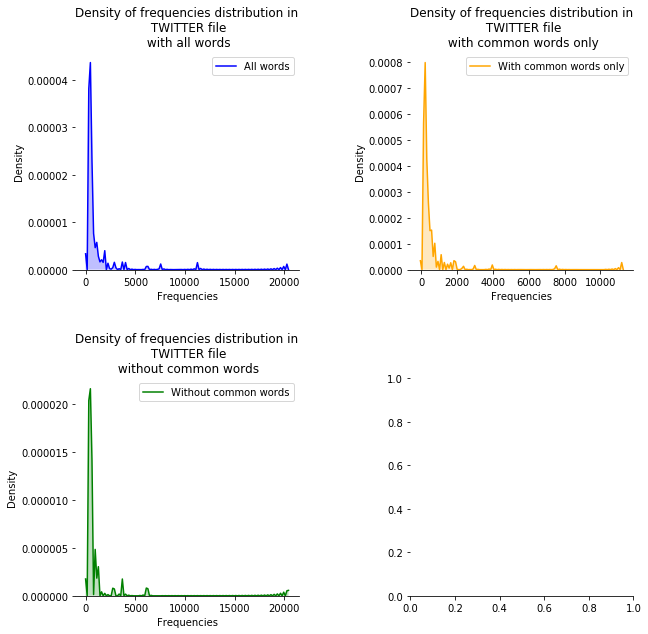

In [120]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.despine(left=True)

ax1 = sns.distplot(sum_twitter, hist=False, color="b",
                   kde_kws={"shade": True}, ax=axes[0, 0], label="All words")
ax2 = sns.distplot(sum_twitter_cw, hist=False, color="orange",
                   kde_kws={"shade": True}, ax=axes[0, 1], label="With common words only")
ax3 = sns.distplot(sum_twitter_wcw, hist=False, color="g",
                   kde_kws={"shade": True}, ax=axes[1, 0], label="Without common words")

ax1.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n TWITTER file\n with all words')
ax2.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n TWITTER file\n with common words only')
ax3.set(xlabel='Frequencies', ylabel='Density',
        title='Density of frequencies distribution in\n TWITTER file\n without common words')
plt.show()

## Superposition of density plots

### With all the words

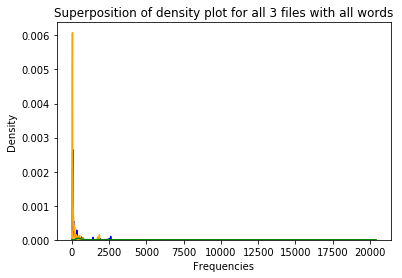

In [121]:
plt.title('Superposition of density plot for all 3 files with all words')
plt.xlabel('Frequencies')
plt.ylabel('Density')
sns.distplot(sum_annotate, hist=False, color="b", kde_kws={"shade": True})
sns.distplot(sum_others_annotate, hist=False,
             color="orange", kde_kws={"shade": True})
sns.distplot(sum_twitter, hist=False, color="g", kde_kws={"shade": True})
plt.show()

We can zoom on the graph :

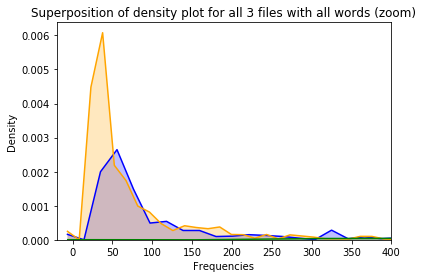

In [122]:
plt.title('Superposition of density plot for all 3 files with all words (zoom)')
plt.xlabel('Frequencies')
plt.ylabel('Density')
plt.xlim(-20, 400)
sns.distplot(sum_annotate, hist=False, color="b", kde_kws={"shade": True})
sns.distplot(sum_others_annotate, hist=False,
             color="orange", kde_kws={"shade": True})
sns.distplot(sum_twitter, hist=False, color="g", kde_kws={"shade": True})
plt.show()

Because TWITTER file has a lot more rows than the others, we can display the graph with a logarithm scale on the horizontal axis.

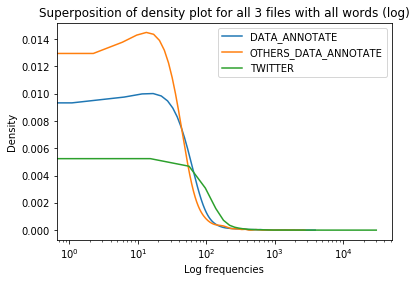

In [123]:
plt.title('Superposition of density plot for all 3 files with all words (log)')
plt.xlabel('Log frequencies')
sum_annotate.plot.density(logx=True, label='DATA_ANNOTATE')
sum_others_annotate.plot.density(logx=True, label='OTHERS_DATA_ANNOTATE')
sum_twitter.plot.density(logx=True, label='TWITTER')
plt.legend()

### With common words only

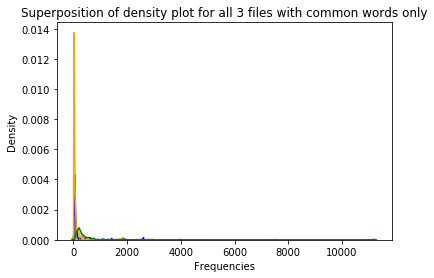

In [124]:
plt.title('Superposition of density plot for all 3 files with common words only')
plt.xlabel('Frequencies')
plt.ylabel('Density')
sns.distplot(sum_annotate_cw, hist=False, color="b", kde_kws={"shade": True})
sns.distplot(sum_others_annotate_cw, hist=False,
             color="orange", kde_kws={"shade": True})
sns.distplot(sum_twitter_cw, hist=False, color="g", kde_kws={"shade": True})
plt.show()

We can zoom on the graph :

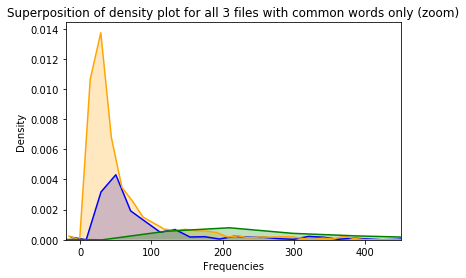

In [125]:
plt.title('Superposition of density plot for all 3 files with common words only (zoom)')
plt.xlabel('Frequencies')
plt.ylabel('Density')
plt.xlim(-20, 450)
sns.distplot(sum_annotate_cw, hist=False, color="b", kde_kws={"shade": True})
sns.distplot(sum_others_annotate_cw, hist=False,
             color="orange", kde_kws={"shade": True})
sns.distplot(sum_twitter_cw, hist=False, color="g", kde_kws={"shade": True})
plt.show()

Because TWITTER file has a lot more rows than the others, we can display the graph with a logarithm scale on the horizontal axis.

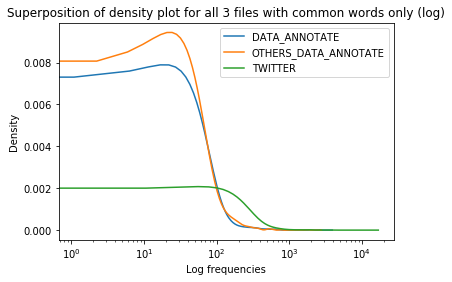

In [126]:
plt.title(
    'Superposition of density plot for all 3 files with common words only (log)')
plt.xlabel('Log frequencies')
sum_annotate_cw.plot.density(logx=True, label='DATA_ANNOTATE')
sum_others_annotate_cw.plot.density(logx=True, label='OTHERS_DATA_ANNOTATE')
sum_twitter_cw.plot.density(logx=True, label='TWITTER')
plt.legend()

### Without common words

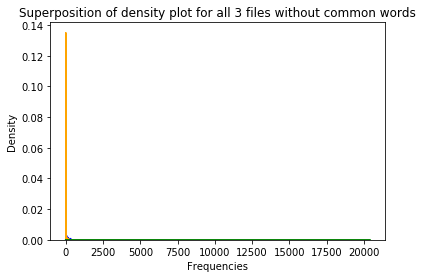

In [127]:
plt.title('Superposition of density plot for all 3 files without common words')
plt.xlabel('Frequencies')
plt.ylabel('Density')
sns.distplot(sum_annotate_wcw, hist=False, color="b", kde_kws={"shade": True})
sns.distplot(sum_others_annotate_wcw, hist=False,
             color="orange", kde_kws={"shade": True})
sns.distplot(sum_twitter_wcw, hist=False, color="g", kde_kws={"shade": True})

We can zoom on the graph :

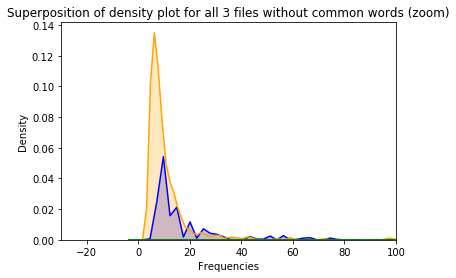

In [128]:
plt.title('Superposition of density plot for all 3 files without common words (zoom)')
plt.xlabel('Frequencies')
plt.ylabel('Density')
plt.xlim(-30, 100)
sns.distplot(sum_annotate_wcw, hist=False, color="b", kde_kws={"shade": True})
sns.distplot(sum_others_annotate_wcw, hist=False,
             color="orange", kde_kws={"shade": True})
sns.distplot(sum_twitter_wcw, hist=False, color="g", kde_kws={"shade": True})

Because TWITTER file has a lot more rows than the others, we can display the graph with a logarithm scale on the horizontal axis.

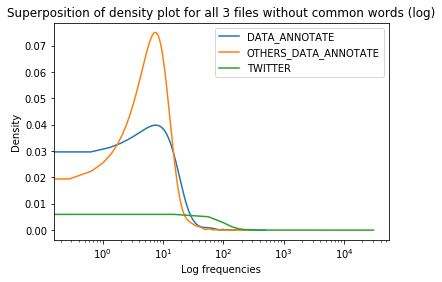

In [129]:
plt.title('Superposition of density plot for all 3 files without common words (log)')
plt.xlabel('Log frequencies')
sum_annotate_wcw.plot.density(logx=True, label='DATA_ANNOTATE')
sum_others_annotate_wcw.plot.density(logx=True, label='OTHERS_DATA_ANNOTATE')
sum_twitter_wcw.plot.density(logx=True, label='TWITTER')
plt.legend()

For each density superposition plots, we observe an almost similar density of frequencies between DATA_ANNOTATE and OTHERS_DATA_ANNOTATE, while the density for TWITTER file is way weaker.

## Spearman correlation

Spearman correlation between all_data_annotate and others_data_annotate (common words only) :

In [130]:
scipy.stats.spearmanr(sum_annotate_cw, sum_others_annotate_cw)

SpearmanrResult(correlation=0.7970089059438441, pvalue=7.802894161619731e-151)

On one hand, we observe a monotonic trend of the ranks of the common words between DATA_ANNOTATE and OTHERS_DATA_ANNOTATE files. On the other hand, we don't observe a specific trend between DATA_ANNOTATE and TWITTER files, same conclusion for OTHERS_DATA_ANNOTATE and TWITTER files with a close spearman coefficient between these two last correlations :

Spearman correlation between all_data_annotate and twitter (common words only) :

In [132]:
scipy.stats.spearmanr(sum_annotate_cw, sum_twitter_cw)

SpearmanrResult(correlation=0.2367123142850761, pvalue=3.975169410657428e-10)

Spearman correlation between twitter and others_data_annotate (common words only) :

In [133]:
scipy.stats.spearmanr(sum_others_annotate_cw, sum_twitter_cw)

SpearmanrResult(correlation=0.24868962047429563, pvalue=4.6557065364926196e-11)

# Correlations

Before performing correlations, we have looked for the number of filled rows for each pair of columns in a data source

In [4]:
def nbRows (data: str, limit: int):
    """Documentation
  
    Number of filled rows
    Display the number of filled rows for each pair of columns in a data source
    
    Parameters:
        data : name of data source
        limit : limit of the number for which the result is returned

    """
    
    list=[]
    for  col1 in data:
        list.append(col1)
        for col2 in data:
            if col2 not in list:
                nbRows = 0
                a = data.get(col1).isna()
                b = data.get(col2).isna()
                for i in range (0,len(data)):
                    if (not a[i] and not b[i]):
                        nbRows += 1
                if nbRows > limit:
                        print(col1, col2, nbRows)
    

In [5]:
# Display of the number of filled rows for each pair of columns in ALL_DATA_ANNOTATE (number > 500)
nbRows(all_data_annotate, 500)

Data_Source Airline_Name 6039
Data_Source Aircraft_Type 2928
Data_Source Cabin_Class 1162
Data_Source Type_Of_Traveller 648
Data_Source Date_Flown 641
Data_Source Route 859
Data_Source Cabin_Staff_Service 1237
Data_Source Food_And_Beverages 1211
Data_Source Ground_Service 525
Data_Source Inflight_Entertainment 1052
Data_Source Seat 2257
Data_Source Seat_Comfort 1033
Data_Source Value_For_Money 1183
Data_Source Overall_Customer_Rating 3586
Data_Source Recommended 1504
Data_Source Date_Review 3872
Data_Source Review 6039
Data_Source Sentence 6039
Data_Source LABEL_SEAT 2413
Data_Source LABEL_IFE 565
Data_Source LABEL_FOOD 722
Data_Source LABEL_CABIN_CREW 1418
Data_Source LABEL_PUNCTUALITY 1080
Data_Source LABEL_ATTRACTIVE_AIRCRAFT 851
Data_Source LABEL_GENERAL 1000
Airline_Name Aircraft_Type 2928
Airline_Name Cabin_Class 1162
Airline_Name Type_Of_Traveller 648
Airline_Name Date_Flown 641
Airline_Name Route 859
Airline_Name Cabin_Staff_Service 1237
Airline_Name Food_And_Beverages 1211
Air

ALL_DATA_ANNOTATE consists of 6039 lines. We can see that many pairs have much smaller numbers. As a result, it is difficult to calculate correlations across many pairs initially targeted as being of intererest.

In [7]:
# Display of the number of filled rows for each pair of columns in ALL_DATA (number > 500)
nbRows(all_data, 500)

Data_Source Airline_Name 150453
Data_Source Airline_Type 11133
Data_Source Region_Operation 11133
Data_Source Aircraft_Type 51847
Data_Source Cabin_Class 105510
Data_Source Type_Of_Lounge 3942
Data_Source Type_Of_Traveller 61132
Data_Source Date_Visit 2034
Data_Source Date_Flown 60975
Data_Source Airport 4118
Data_Source Route 61759
Data_Source Category 11133
Data_Source Category_Detail 11132
Data_Source Cabin_Staff_Service 89279
Data_Source Lounge_Staff_Service 4127
Data_Source Bar_And_Beverages 4131
Data_Source Food_And_Beverages 77397
Data_Source Ground_Service 58899
Data_Source Catering 4176
Data_Source Cleanliness 4197
Data_Source Lounge_Comfort 4199
Data_Source Aisle_Space 2815
Data_Source Wifi_And_Connectivity 21091
Data_Source Inflight_Entertainment 65114
Data_Source Viewing_Tv_Screen 2277
Data_Source Power_Supply 891
Data_Source Seat 19395
Data_Source Seat_Type 2862
Data_Source Seat_Comfort 87794
Data_Source Seat_Legroom 4495
Data_Source Seat_Storage 1704
Data_Source Seat_Recl

Lounge_Staff_Service Washrooms 3713
Lounge_Staff_Service Overall_Customer_Rating 4125
Lounge_Staff_Service Recommended 4127
Lounge_Staff_Service Date_Review 4127
Lounge_Staff_Service Review 4127
Bar_And_Beverages Catering 4121
Bar_And_Beverages Cleanliness 4128
Bar_And_Beverages Lounge_Comfort 4127
Bar_And_Beverages Wifi_And_Connectivity 3849
Bar_And_Beverages Washrooms 3708
Bar_And_Beverages Overall_Customer_Rating 4130
Bar_And_Beverages Recommended 4131
Bar_And_Beverages Date_Review 4131
Bar_And_Beverages Review 4131
Food_And_Beverages Ground_Service 45308
Food_And_Beverages Wifi_And_Connectivity 16267
Food_And_Beverages Inflight_Entertainment 63515
Food_And_Beverages Seat 1687
Food_And_Beverages Seat_Comfort 75677
Food_And_Beverages Seat_Legroom 1259
Food_And_Beverages Seat_Recline 1270
Food_And_Beverages Seat_Width 1275
Food_And_Beverages Value_For_Money 75680
Food_And_Beverages Overall_Customer_Rating 72746
Food_And_Beverages Recommended 75680
Food_And_Beverages Date_Review 77397


ALL_DATA consists of 150453 lines. We can see that many pairs have much smaller numbers. As a result, it is difficult to calculate correlations across many pairs initially targeted as being of intererest.